In [2]:
import time
import numpy as np
import matplotlib.pyplot as plt
from Functions import StatisticalAnalysis

from scipy import stats
from sklearn.decomposition import PCA, FastICA

In [2]:
def draw_histograms(df, variables, n_rows, n_cols):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=10,ax=ax)
        ax.set_title(var_name+" Distribution")
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

In [48]:
x = np.loadtxt('FirstMixture1000Stats.txt')
x.shape

(3, 1000)

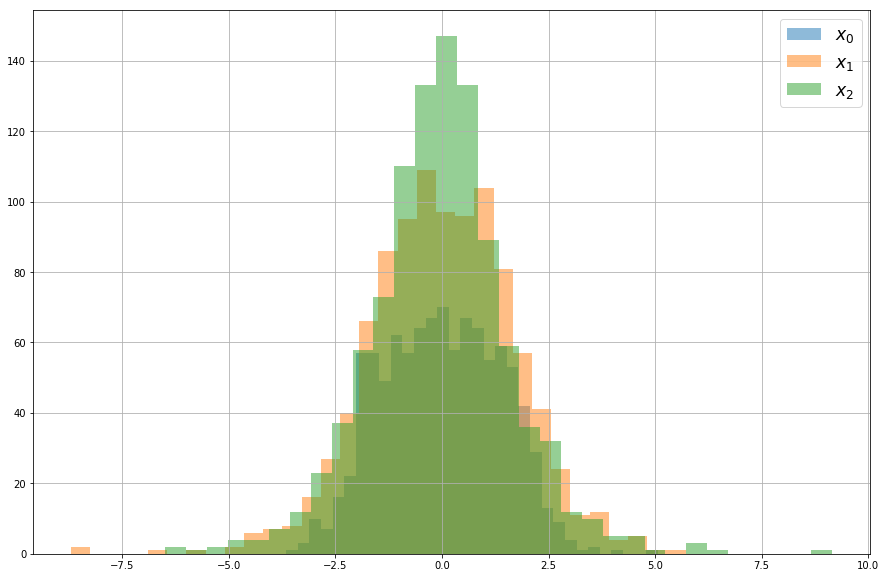

In [49]:
fig, ax = plt.subplots(1,figsize=(15,10))

for i in range(x.shape[0]):
    plt.hist(x[i,:],bins='sqrt',alpha=.5,label=r'$x_%.f$'%(i))

plt.legend(fontsize = 'xx-large')
plt.grid()
plt.show()

In [50]:
init_time = time.time()
ica = FastICA(n_components=x.shape[0],algorithm='parallel',
              whiten=True,fun='logcosh')
fit = ica.fit(x.T)
print 'number of interations:', fit.n_iter_ 
y = ica.transform(x.T)
y = y.T
current_time = time.time()
print 'Time to converges the FastICA: %1.3f seconds'%(current_time-init_time)

number of interations: 4
Time to converges the FastICA: 0.004 seconds


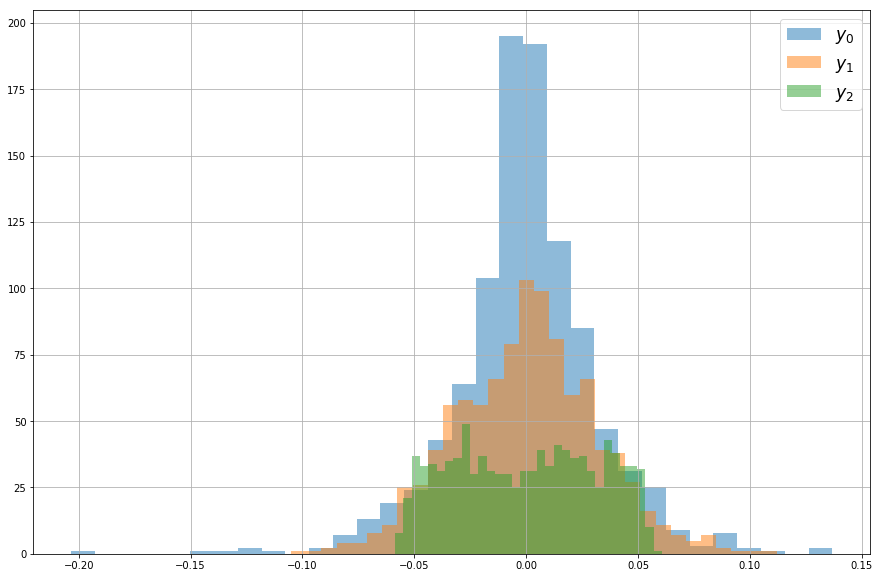

In [51]:
fig, ax = plt.subplots(1,figsize=(15,10))

for i in range(y.shape[0]):
    plt.hist(y[i,:],bins='sqrt',alpha=.5,label=r'$y_%.f$'%(i))


plt.legend(fontsize = 'xx-large')
plt.grid()
plt.show()

EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode


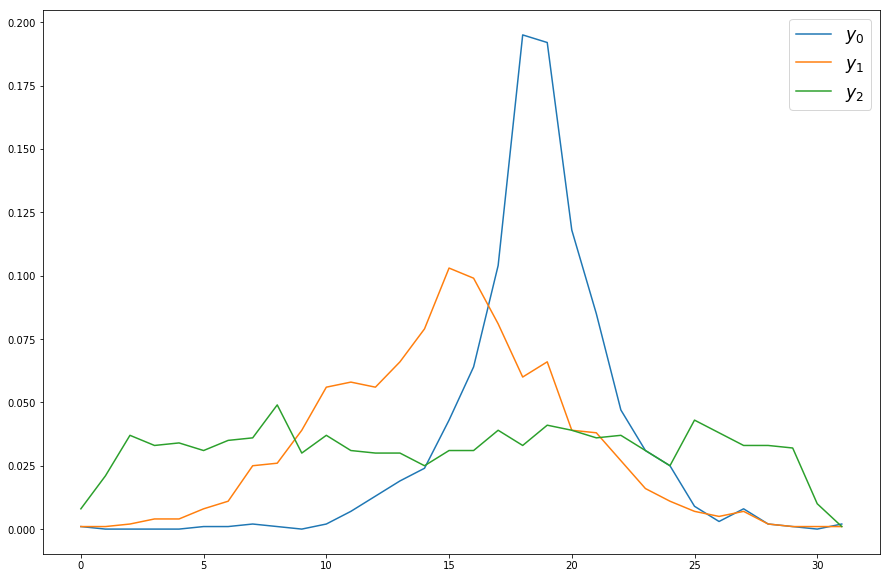

In [52]:
list_pdf = []
for j in range(y.shape[0]):
    list_pdf.append(StatisticalAnalysis.EstPDF(y[j,:],bins='sqrt',mode='hist'))

fig, ax = plt.subplots(1,figsize=(15,10))

for k in range(len(list_pdf)):
    plt.plot(list_pdf[k][0],label=r'$y_%.f$'%(k))
    
plt.legend(fontsize = 'xx-large')
plt.show()

In [53]:
for i in range(y.shape[0]):
    print 'mean and variance', np.mean(y[i,:]),np.var(y[i,:])

mean and variance 7.21644966006e-19 0.001
mean and variance -2.55351295664e-18 0.001
mean and variance 1.55431223448e-18 0.001


In [54]:
i_stats = y.shape[1]
loc, scale = 0.,1.
laplacian = np.reshape(np.random.laplace(np.mean(y[1,:]),np.std(y[1,:]), i_stats),[1,i_stats])
uniform = np.reshape(np.random.uniform(-2*np.std(y[2,:]),2*np.std(y[2,:]),i_stats),[1,i_stats])
gaus = np.reshape(np.random.normal(np.mean(y[0,:]),np.std(y[0,:]),i_stats),[1,i_stats])

s = np.zeros([3,i_stats])
s[2,:] = uniform
s[1,:] = gaus
s[0,:] = laplacian

In [46]:
def CreateKLsMatrix(components,sources):
    KL_ida = np.zeros([components.shape[0],components.shape[0]])
    KL_volta = np.zeros([components.shape[0],components.shape[0]])
    for j in range(components.shape[0]):
        for i in range(components.shape[0]):
            KL_ida[i][j]= StatisticalAnalysis.KLDiv(components[i,:],sources[j,:],bins='sqrt', mode='hist', kernel='epanechnikov', kernel_bw=0.1)[0]
            KL_volta[i][j]= StatisticalAnalysis.KLDiv(sources[i,:],components[j,:],bins='sqrt', mode='hist', kernel='epanechnikov', kernel_bw=0.1)[0]

    return [KL_values_ida,KL_values_volta]

In [60]:
KL_div= CreateKLsMatrix(y,s)

print KL_div

EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
[array([[ 0.19956545,  0.30548426,  0.34302768],
       [ 0.27597502,  0.07366368,  0.59308916],
       [ 0.31280479,  0.42476951,  0.17537603]]), array([[ 0.28662925,  0.4

In [26]:
KL_values_ida = np.zeros([y.shape[0],y.shape[0]])
KL_values_volta = np.zeros([y.shape[0],y.shape[0]])
for j in range(y.shape[0]):
    for i in range(y.shape[0]):
        KL_values_ida[i][j]= StatisticalAnalysis.KLDiv(y[i,:],s[j,:],bins='sqrt', mode='hist', kernel='epanechnikov', kernel_bw=0.1)[0]
        KL_values_volta[i][j]= StatisticalAnalysis.KLDiv(s[i,:],y[j,:],bins='sqrt', mode='hist', kernel='epanechnikov', kernel_bw=0.1)[0]

KL_values_ida,KL_values_volta

EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode


(array([[ 0.19956545,  0.30548426,  0.34302768],
        [ 0.27597502,  0.07366368,  0.59308916],
        [ 0.31280479,  0.42476951,  0.17537603]]),
 array([[ 0.28662925,  0.42013033,  0.2378844 ],
        [ 0.28326968,  0.11210226,  0.44640326],
        [ 0.5035536 ,  0.7398083 ,  0.1529202 ]]))

In [37]:
#Calculate the Jensen-Shanon Divergence
def JSDiv(KL_ida,KL_volta):
    JS = np.mean( np.array([ KL_values_ida, KL_values_volta ]), axis=0 )
    return JS
np.mean( np.array([ KL_values_ida, KL_values_volta ]), axis=0 )

array([[ 0.24309735,  0.36280729,  0.29045604],
       [ 0.27962235,  0.09288297,  0.51974621],
       [ 0.4081792 ,  0.5822889 ,  0.16414812]])

In [58]:
JSDiv(KL_div[0],KL_div[1])


array([[ 0.24309735,  0.36280729,  0.29045604],
       [ 0.27962235,  0.09288297,  0.51974621],
       [ 0.4081792 ,  0.5822889 ,  0.16414812]])

In [59]:
# Calculate the kurtosis
kurtosis = []
for i in range(y.shape[0]):
    kurtosis.append(stats.kstat(y[i,:],4))
print kurtosis

[3.6652928478346873e-06, 2.0187795008117777e-07, -1.2170214772301563e-06]


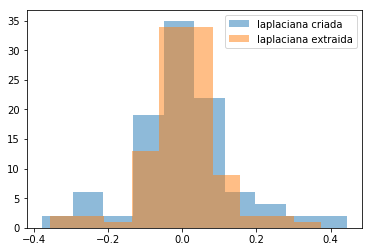

In [15]:
plt.hist(s[2,:],bins='sqrt',alpha=.5,label='laplaciana criada')
plt.hist(y[1,:],bins='sqrt',alpha=.5,label='laplaciana extraida')
plt.legend()
plt.show()

In [80]:
def PDFList(data,bins='sqrt',mode='hist', kernel='epanechnikov', kernel_bw=0.01):
    PDFList = []
    for i in range(data.shape[0]):
        PDFList.append(StatisticalAnalysis.EstPDF(data[j,:],bins=bins,mode=mode,kernel=kernel,kernel_bw=kernel_bw))
    return PDFList
    

In [83]:
PDFList(y,bins='sqrt',mode='hist',kernel='epanechnikov',kernel_bw=0.01)

EstPDF: Histogram Mode
EstPDF: Histogram Mode
EstPDF: Histogram Mode


[[array([ 0.03,  0.03,  0.07,  0.16,  0.19,  0.18,  0.19,  0.09,  0.04,  0.02]),
  array([-0.2063205 , -0.15569021, -0.10505992, -0.05442962, -0.00379933,
          0.04683097,  0.09746126,  0.14809155,  0.19872185,  0.24935214])],
 [array([ 0.03,  0.03,  0.07,  0.16,  0.19,  0.18,  0.19,  0.09,  0.04,  0.02]),
  array([-0.2063205 , -0.15569021, -0.10505992, -0.05442962, -0.00379933,
          0.04683097,  0.09746126,  0.14809155,  0.19872185,  0.24935214])],
 [array([ 0.03,  0.03,  0.07,  0.16,  0.19,  0.18,  0.19,  0.09,  0.04,  0.02]),
  array([-0.2063205 , -0.15569021, -0.10505992, -0.05442962, -0.00379933,
          0.04683097,  0.09746126,  0.14809155,  0.19872185,  0.24935214])]]

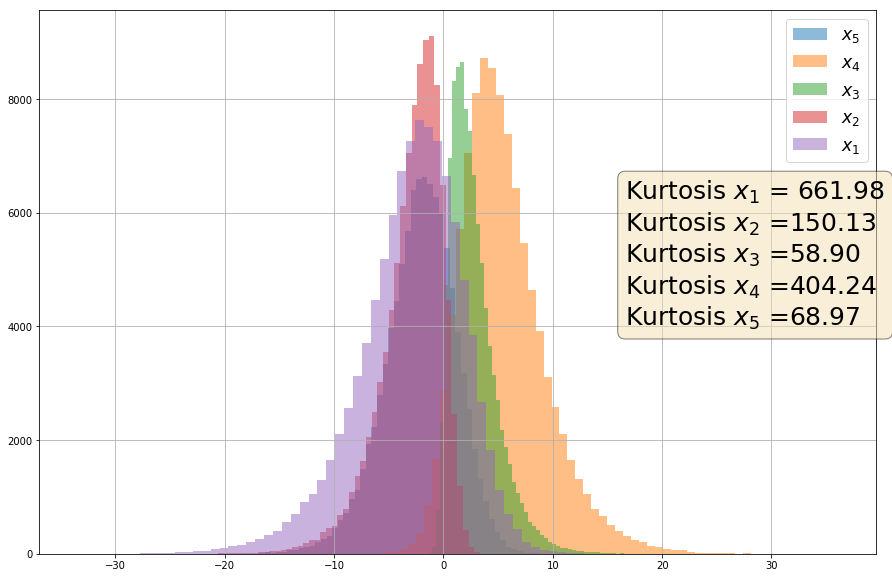

In [86]:
fig, ax = plt.subplots(1,figsize=(15,10))

k1 = stats.kstat(x[0,:],4)
k2 = stats.kstat(x[1,:],4)
k3 = stats.kstat(x[2,:],4)
k4 = stats.kstat(x[3,:],4)
k5 = stats.kstat(x[4,:],4)
textstr = 'Kurtosis $x_1$ = %.2f\nKurtosis $x_2$ =%.2f\nKurtosis $x_3$ =%.2f\nKurtosis $x_4$ =%.2f\nKurtosis $x_5$ =%.2f'%(k1,k2,k3,k4,k5)


props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.7, 0.69, textstr, transform=ax.transAxes, fontsize=25,
        verticalalignment='top', bbox=props)

plt.hist(x[4,:],bins=60,alpha=.5,label=r'$x_5$')
plt.hist(x[3,:],bins=60,alpha=.5,label=r'$x_4$')
plt.hist(x[2,:],bins=60,alpha=.5,label=r'$x_3$')
plt.hist(x[1,:],bins=60,alpha=.5,label=r'$x_2$')
plt.hist(x[0,:],bins=60,alpha=.5,label=r'$x_1$')

plt.legend(fontsize = 'xx-large')
plt.grid()
plt.show()

In [100]:
ica = FastICA(n_components=x.shape[0],algorithm='parallel',
              whiten=False,fun='cube')
y = ica.fit_transform(x.T)
y = y.T

In [83]:
y.shape

(5, 100000)

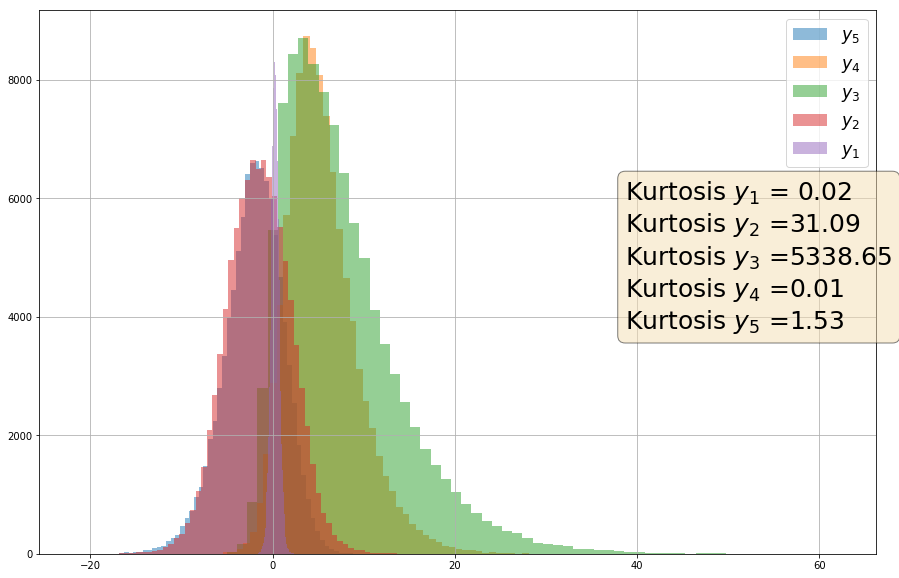

In [101]:
fig, ax = plt.subplots(1,figsize=(15,10))

k1 = stats.kstat(y[0,:],4)
k2 = stats.kstat(y[1,:],4)
k3 = stats.kstat(y[2,:],4)
k4 = stats.kstat(y[3,:],4)
k5 = stats.kstat(y[4,:],4)
textstr = 'Kurtosis $y_1$ = %.2f\nKurtosis $y_2$ =%.2f\nKurtosis $y_3$ =%.2f\nKurtosis $y_4$ =%.2f\nKurtosis $y_5$ =%.2f'%(k1,k2,k3,k4,k5)



props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.7, 0.69, textstr, transform=ax.transAxes, fontsize=25,
        verticalalignment='top', bbox=props)

plt.hist(x[4,:],bins=60,alpha=.5,label=r'$y_5$')
plt.hist(x[3,:],bins=60,alpha=.5,label=r'$y_4$')
plt.hist(y[2,:],bins=60,alpha=.5,label=r'$y_3$')
plt.hist(y[1,:],bins=60,alpha=.5,label=r'$y_2$')
plt.hist(y[0,:],bins=60,alpha=.5,label=r'$y_1$')
plt.legend(fontsize = 'xx-large')
plt.grid()
plt.show()

In [105]:
l = []
for i in range(3):
    a = i
    l.append(a)
l

[0, 1, 2]